<a href="https://colab.research.google.com/github/alitrose/EMPOLYEE-SALARAY-PREDICTION/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving adult 3.csv to adult 3 (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv("adult 3.csv")
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:

data.replace('?', pd.NA, inplace=True)

data.dropna(inplace=True)

data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']

data = data[~data['education'].isin(['Preschool', '5th-6th', '1st-4th'])]

data.drop(columns=['education'], inplace=True)

data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

data.head()


/tmp/ipython-input-3-1258546376.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])


In [ ]:
X = data.drop('income', axis=1)
y = data['income']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.856612685560054

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6699
           1       0.74      0.65      0.69      2193

    accuracy                           0.86      8892
   macro avg       0.81      0.79      0.80      8892
weighted avg       0.85      0.86      0.85      8892


Confusion Matrix:
 [[6199  500]
 [ 775 1418]]


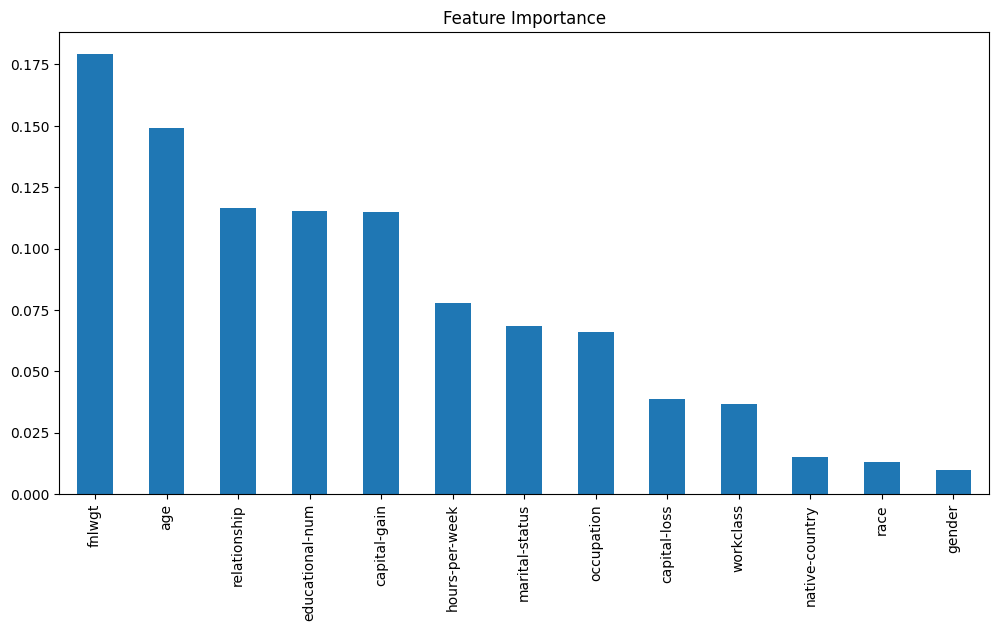

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance")
plt.show()


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
gender
Male      32650
Female    16192
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               75

/tmp/ipython-input-4-2802376096.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'others'},inplace=True)


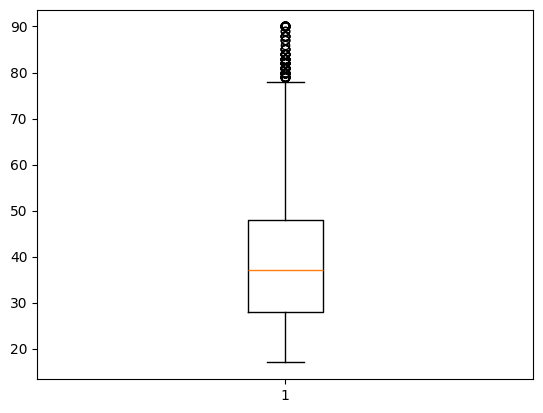

In [4]:
import pandas as pd

data=pd.read_csv("/content/adult 3.csv")

data

data.tail

data.shape

data.isna()

data.isna().sum()

data.tail(7)

print(data.occupation.value_counts())

print(data.gender.value_counts())

print(data['marital-status'].value_counts())

print(data['education'].value_counts())

print(data['workclass'].value_counts())

data.workclass.replace({'?':'others'},inplace=True)

print(data['workclass'].value_counts())

data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

print(data['workclass'].value_counts())

data.shape

data=data[data['education']!='5th-6th']
data=data[data['education']!='1st-4th']
data=data[data['education']!='Preschool']

print(data['education'].value_counts())



data.shape

data.drop(columns=['education'],inplace=True)

data

import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()